In [1]:
!pip install --user tensorflow matplotlib librosa scipy keras pandas tqdm

In [298]:
import pandas as pd
import os
import librosa
import librosa.display
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm
%matplotlib inline

# Prepare dataset by merging everything into 1

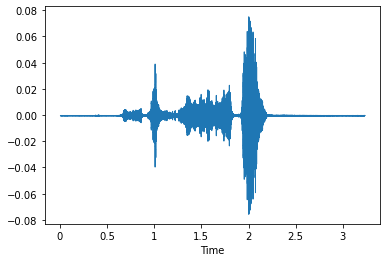

In [3]:
file_name='REDUCED_DATASET/Anger/1-1.wav'

audio_data, sampling_rate = librosa.load(file_name)
librosa.display.waveshow(audio_data,sr=sampling_rate)
ipd.Audio(file_name)

In [4]:
audio_data

array([-9.23932873e-07, -1.76113520e-06,  2.11706774e-05, ...,
        1.81441756e-05, -1.14129225e-05,  0.00000000e+00], dtype=float32)

In [5]:
sampling_rate

22050

In [6]:
import csv
fieldHeader = ['filename', 'classNum', 'className']

individualField = []

fields = []

int2emotion = {
    "1":"Anger",
    "2":"Disgust",
    "3":"Fear",
    "4":"Happiness",
    "5":"Neutral" ,
    "6":"Sadness"
}

for file in glob.glob("REDUCED_DATASET/*/*.wav"):
        basename = os.path.basename(file)
#         print(basename)
        emotionNum = basename.split("-")[0]
#         print(emotionNum)
        emotion = int2emotion[emotionNum]
        
        individualField.append(basename)
        individualField.append(emotionNum)
        individualField.append(emotion)
        
        fields.append(individualField)
        individualField = []


with open("data.csv", 'w') as csvfile:
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile)

    # writing the fields 
    csvwriter.writerow(fieldHeader) 

    # writing the data rows 
    csvwriter.writerows(fields)

In [7]:
audio_dataset_path='REDUCED_DATASET/'
metadata=pd.read_csv('data.csv')
metadata.last

<bound method NDFrame.last of        filename  classNum className
0       1-1.wav         1     Anger
1      1-10.wav         1     Anger
2     1-100.wav         1     Anger
3     1-101.wav         1     Anger
4     1-102.wav         1     Anger
...         ...       ...       ...
2278   6-95.wav         6   Sadness
2279   6-96.wav         6   Sadness
2280   6-97.wav         6   Sadness
2281   6-98.wav         6   Sadness
2282   6-99.wav         6   Sadness

[2283 rows x 3 columns]>

In [8]:
metadata['className'].value_counts()

Anger        456
Happiness    383
Fear         380
Sadness      371
Disgust      349
Neutral      344
Name: className, dtype: int64

In [9]:
# metadata = metadata[metadata["className"].str.contains("Disgust|Neutral") == False]

In [10]:
metadata['className'].value_counts()

Anger        456
Happiness    383
Fear         380
Sadness      371
Disgust      349
Neutral      344
Name: className, dtype: int64

In [11]:
metadata.shape

(2283, 3)

In [12]:
mfccs = librosa.feature.mfcc(y=audio_data, sr=sampling_rate, n_mfcc=40)

In [13]:
mfccs

array([[-8.3729504e+02, -8.3082629e+02, -8.2940363e+02, ...,
        -8.1635181e+02, -8.1001788e+02, -8.1799994e+02],
       [ 2.1596325e+01,  2.9798019e+01,  3.1245426e+01, ...,
         3.4200729e+01,  3.4749878e+01,  3.2513508e+01],
       [ 1.9498917e+01,  2.5346542e+01,  2.5728140e+01, ...,
         1.6740858e+01,  1.3061163e+01,  1.5445694e+01],
       ...,
       [-2.9153874e+00, -4.0367823e+00, -5.5139408e+00, ...,
         2.7224958e-01,  1.0676227e+00,  2.3561274e-01],
       [-2.7552519e+00, -3.1498392e+00, -5.2774787e+00, ...,
        -1.5427837e+00, -1.9620079e+00, -2.3148668e+00],
       [-2.3192921e+00, -2.0389476e+00, -4.6908236e+00, ...,
        -3.7304606e+00, -1.9577286e+00, -1.3225406e+00]], dtype=float32)

In [14]:
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [15]:
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
#     file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["filename"]))
    file_name = "REDUCED_DATASET/"+row['className']+"/"+row['filename']
    final_class_labels=row["className"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

2283it [25:05,  1.52it/s]


In [16]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [17]:
extracted_features

[[array([-6.4037701e+02,  6.1679173e+01, -1.1988214e+01,  1.5773420e+01,
         -1.2838718e+00,  1.0437617e+01, -4.0979939e+00,  1.8340857e+00,
         -9.1428995e+00,  1.0313268e+00, -1.9568460e+00, -2.7680695e-01,
         -7.5027843e+00,  4.3509564e+00, -2.0198523e-01,  1.9334148e+00,
         -1.4462075e+00, -1.5064088e-01, -4.0974402e+00, -8.1106508e-01,
         -5.6934814e+00, -1.8960102e-01, -3.9910879e+00, -1.1303335e+00,
         -1.2117537e+00,  1.3872689e+00, -1.2896252e+00, -1.2626398e+00,
         -2.4559982e+00, -7.4857104e-01, -6.0009527e-01, -5.2648830e-01,
         -2.2399864e+00, -5.6436485e-01, -2.7564421e+00, -2.3237884e+00,
         -2.7741764e+00, -2.8904040e+00, -1.6143954e+00, -1.4471475e+00],
        dtype=float32),
  'Anger'],
 [array([-3.8070447e+02,  4.4045471e+01, -4.0618320e+01,  7.5451894e+00,
         -7.8017678e+00, -5.3147798e+00, -2.0840321e+01,  2.3193488e+00,
         -1.7923101e+01, -6.7548542e+00, -1.2468147e+01, -3.2828958e+00,
         -8.72

In [18]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.to_csv("features_data.csv")

In [19]:
extracted_features_df['class'].value_counts()

Anger        456
Happiness    383
Fear         380
Sadness      371
Disgust      349
Neutral      344
Name: class, dtype: int64

In [20]:
# extracted_features_df2 = extracted_features_df[extracted_features_df["class"].str.contains("Disgust|Neutral") == False]
extracted_features_df2 = extracted_features_df

In [21]:
extracted_features_df2['class'].value_counts()

Anger        456
Happiness    383
Fear         380
Sadness      371
Disgust      349
Neutral      344
Name: class, dtype: int64

In [22]:
# extracted_features_df = pd.read_csv("features_data.csv", usecols=['feature','class'])
# extracted_features_df.head(10)

In [79]:
X=np.array(extracted_features_df2['feature'].tolist())
y=np.array(extracted_features_df2['class'].tolist())

In [80]:
X.shape

(2283, 40)

In [81]:
y

array(['Anger', 'Anger', 'Anger', ..., 'Sadness', 'Sadness', 'Sadness'],
      dtype='<U9')

In [82]:
y.shape

(2283,)

In [109]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [110]:
y

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [116]:
y.shape

(2283, 6)

In [112]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [113]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv1D
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras import layers


In [117]:
num_labels=y.shape[1]

In [327]:
model=Sequential()
initializer = tf.keras.initializers.Orthogonal()

###first layer
model.add(Dense(64,input_shape=(40,)))
model.add(Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.3))

###second layer
model.add(Dense(128, kernel_initializer=initializer))
model.add(Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.3))

###third layer
model.add(Dense(256, kernel_initializer=initializer))
model.add(Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.4))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [328]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 64)                2624      
                                                                 
 activation_120 (Activation)  (None, 64)               0         
                                                                 
 batch_normalization_90 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_93 (Dropout)        (None, 64)                0         
                                                                 
 dense_121 (Dense)           (None, 128)               8320      
                                                                 
 activation_121 (Activation)  (None, 128)              0         
                                                     

In [329]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [330]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 1000
num_batch_size = 512

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=0, save_best_only=True)
start = datetime.now()

# history = model.fit(new_X_train, new_y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(new_X_test, new_y_test), callbacks=[checkpointer], verbose=1)
history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/1000
4/4 [==============================] - 1s 80ms/step - loss: 2.4643 - accuracy: 0.1977 - val_loss: 3.6050 - val_accuracy: 0.1641
Epoch 2/1000
4/4 [==============================] - 0s 42ms/step - loss: 2.1768 - accuracy: 0.2388 - val_loss: 2.8999 - val_accuracy: 0.1619
Epoch 3/1000
4/4 [==============================] - 0s 30ms/step - loss: 2.0705 - accuracy: 0.2645 - val_loss: 2.5257 - val_accuracy: 0.1554
Epoch 4/1000
4/4 [==============================] - 0s 30ms/step - loss: 1.9656 - accuracy: 0.2996 - val_loss: 2.3517 - val_accuracy: 0.1641
Epoch 5/1000
4/4 [==============================] - 0s 28ms/step - loss: 1.8685 - accuracy: 0.3198 - val_loss: 2.3303 - val_accuracy: 0.1751
Epoch 6/1000
4/4 [==============================] - 0s 28ms/step - loss: 1.8174 - accuracy: 0.3341 - val_loss: 2.2920 - val_accuracy: 0.1685
Epoch 7/1000
4/4 [==============================] - 0s 27ms/step - loss: 1.7862 - accuracy: 0.3352 - val_loss: 2.2296 - val_accuracy: 0.1772
Epoch 8/1000


Epoch 59/1000
4/4 [==============================] - 0s 26ms/step - loss: 1.2268 - accuracy: 0.5000 - val_loss: 1.1331 - val_accuracy: 0.5799
Epoch 60/1000
4/4 [==============================] - 0s 25ms/step - loss: 1.2412 - accuracy: 0.4885 - val_loss: 1.1245 - val_accuracy: 0.5777
Epoch 61/1000
4/4 [==============================] - 0s 27ms/step - loss: 1.1985 - accuracy: 0.5131 - val_loss: 1.1172 - val_accuracy: 0.5821
Epoch 62/1000
4/4 [==============================] - 0s 25ms/step - loss: 1.1992 - accuracy: 0.5044 - val_loss: 1.1086 - val_accuracy: 0.5886
Epoch 63/1000
4/4 [==============================] - 0s 26ms/step - loss: 1.2090 - accuracy: 0.5071 - val_loss: 1.1027 - val_accuracy: 0.6039
Epoch 64/1000
4/4 [==============================] - 0s 27ms/step - loss: 1.1847 - accuracy: 0.5181 - val_loss: 1.1019 - val_accuracy: 0.6083
Epoch 65/1000
4/4 [==============================] - 0s 26ms/step - loss: 1.2013 - accuracy: 0.5011 - val_loss: 1.0995 - val_accuracy: 0.6018
Epoch 

4/4 [==============================] - 0s 16ms/step - loss: 1.0576 - accuracy: 0.5696 - val_loss: 1.0576 - val_accuracy: 0.5799
Epoch 117/1000
4/4 [==============================] - 0s 17ms/step - loss: 1.0360 - accuracy: 0.5778 - val_loss: 1.0691 - val_accuracy: 0.5799
Epoch 118/1000
4/4 [==============================] - 0s 15ms/step - loss: 1.0144 - accuracy: 0.5969 - val_loss: 1.0574 - val_accuracy: 0.5908
Epoch 119/1000
4/4 [==============================] - 0s 13ms/step - loss: 1.0431 - accuracy: 0.5756 - val_loss: 1.0535 - val_accuracy: 0.5864
Epoch 120/1000
4/4 [==============================] - 0s 14ms/step - loss: 1.0066 - accuracy: 0.5986 - val_loss: 1.0487 - val_accuracy: 0.5755
Epoch 121/1000
4/4 [==============================] - 0s 14ms/step - loss: 1.0137 - accuracy: 0.5904 - val_loss: 1.0442 - val_accuracy: 0.5821
Epoch 122/1000
4/4 [==============================] - 0s 13ms/step - loss: 1.0463 - accuracy: 0.5685 - val_loss: 1.0482 - val_accuracy: 0.5821
Epoch 123/1000

4/4 [==============================] - 0s 27ms/step - loss: 0.9115 - accuracy: 0.6386 - val_loss: 0.9417 - val_accuracy: 0.6193
Epoch 174/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.9181 - accuracy: 0.6364 - val_loss: 0.9408 - val_accuracy: 0.6061
Epoch 175/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.8888 - accuracy: 0.6506 - val_loss: 0.9450 - val_accuracy: 0.5996
Epoch 176/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.9118 - accuracy: 0.6451 - val_loss: 0.9471 - val_accuracy: 0.6127
Epoch 177/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.8933 - accuracy: 0.6375 - val_loss: 0.9384 - val_accuracy: 0.6258
Epoch 178/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.8828 - accuracy: 0.6528 - val_loss: 0.9401 - val_accuracy: 0.6302
Epoch 179/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.9139 - accuracy: 0.6276 - val_loss: 0.9449 - val_accuracy: 0.6258
Epoch 180/1000

4/4 [==============================] - 0s 15ms/step - loss: 0.8269 - accuracy: 0.6780 - val_loss: 0.8576 - val_accuracy: 0.6477
Epoch 231/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.8404 - accuracy: 0.6588 - val_loss: 0.8536 - val_accuracy: 0.6455
Epoch 232/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.7919 - accuracy: 0.6862 - val_loss: 0.8513 - val_accuracy: 0.6455
Epoch 233/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.8370 - accuracy: 0.6681 - val_loss: 0.8495 - val_accuracy: 0.6477
Epoch 234/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.8342 - accuracy: 0.6605 - val_loss: 0.8551 - val_accuracy: 0.6324
Epoch 235/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.8195 - accuracy: 0.6796 - val_loss: 0.8630 - val_accuracy: 0.6302
Epoch 236/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.8188 - accuracy: 0.6802 - val_loss: 0.8490 - val_accuracy: 0.6389
Epoch 237/1000

4/4 [==============================] - 0s 16ms/step - loss: 0.7667 - accuracy: 0.6900 - val_loss: 0.8207 - val_accuracy: 0.6761
Epoch 288/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.7623 - accuracy: 0.7169 - val_loss: 0.8207 - val_accuracy: 0.6761
Epoch 289/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.7379 - accuracy: 0.7059 - val_loss: 0.8127 - val_accuracy: 0.6827
Epoch 290/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.7733 - accuracy: 0.6911 - val_loss: 0.8082 - val_accuracy: 0.6827
Epoch 291/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.7672 - accuracy: 0.6999 - val_loss: 0.8077 - val_accuracy: 0.6783
Epoch 292/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.7578 - accuracy: 0.6950 - val_loss: 0.8028 - val_accuracy: 0.6827
Epoch 293/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.7641 - accuracy: 0.6977 - val_loss: 0.8126 - val_accuracy: 0.6827
Epoch 294/1000

4/4 [==============================] - 0s 16ms/step - loss: 0.7545 - accuracy: 0.7043 - val_loss: 0.7796 - val_accuracy: 0.6805
Epoch 345/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.7407 - accuracy: 0.7169 - val_loss: 0.7901 - val_accuracy: 0.6718
Epoch 346/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.7522 - accuracy: 0.7059 - val_loss: 0.7977 - val_accuracy: 0.6740
Epoch 347/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.7137 - accuracy: 0.7218 - val_loss: 0.7922 - val_accuracy: 0.6805
Epoch 348/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.6914 - accuracy: 0.7344 - val_loss: 0.7958 - val_accuracy: 0.6783
Epoch 349/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.7235 - accuracy: 0.7251 - val_loss: 0.8056 - val_accuracy: 0.6783
Epoch 350/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.7226 - accuracy: 0.7289 - val_loss: 0.7975 - val_accuracy: 0.7002
Epoch 351/1000

4/4 [==============================] - 0s 15ms/step - loss: 0.7299 - accuracy: 0.7267 - val_loss: 0.7882 - val_accuracy: 0.6937
Epoch 402/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.6787 - accuracy: 0.7311 - val_loss: 0.7886 - val_accuracy: 0.6893
Epoch 403/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.6761 - accuracy: 0.7404 - val_loss: 0.7868 - val_accuracy: 0.7002
Epoch 404/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.7032 - accuracy: 0.7311 - val_loss: 0.7904 - val_accuracy: 0.6827
Epoch 405/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.6713 - accuracy: 0.7388 - val_loss: 0.7911 - val_accuracy: 0.6783
Epoch 406/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.6866 - accuracy: 0.7322 - val_loss: 0.7757 - val_accuracy: 0.6827
Epoch 407/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.6745 - accuracy: 0.7377 - val_loss: 0.7695 - val_accuracy: 0.6937
Epoch 408/1000

4/4 [==============================] - 0s 15ms/step - loss: 0.6756 - accuracy: 0.7366 - val_loss: 0.7697 - val_accuracy: 0.7243
Epoch 459/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.6670 - accuracy: 0.7399 - val_loss: 0.7678 - val_accuracy: 0.7221
Epoch 460/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.6537 - accuracy: 0.7410 - val_loss: 0.7718 - val_accuracy: 0.7068
Epoch 461/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.6608 - accuracy: 0.7382 - val_loss: 0.7810 - val_accuracy: 0.7046
Epoch 462/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.6534 - accuracy: 0.7355 - val_loss: 0.7874 - val_accuracy: 0.7090
Epoch 463/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.6504 - accuracy: 0.7497 - val_loss: 0.7971 - val_accuracy: 0.6958
Epoch 464/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.6619 - accuracy: 0.7432 - val_loss: 0.8148 - val_accuracy: 0.7068
Epoch 465/1000

4/4 [==============================] - 0s 13ms/step - loss: 0.6268 - accuracy: 0.7629 - val_loss: 0.8053 - val_accuracy: 0.7177
Epoch 516/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.6405 - accuracy: 0.7640 - val_loss: 0.8161 - val_accuracy: 0.7046
Epoch 517/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.6359 - accuracy: 0.7530 - val_loss: 0.8062 - val_accuracy: 0.7133
Epoch 518/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.6247 - accuracy: 0.7590 - val_loss: 0.7860 - val_accuracy: 0.7330
Epoch 519/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.6381 - accuracy: 0.7492 - val_loss: 0.7851 - val_accuracy: 0.7221
Epoch 520/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.5959 - accuracy: 0.7640 - val_loss: 0.8006 - val_accuracy: 0.6915
Epoch 521/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.5937 - accuracy: 0.7716 - val_loss: 0.8030 - val_accuracy: 0.7002
Epoch 522/1000

4/4 [==============================] - 0s 13ms/step - loss: 0.6064 - accuracy: 0.7623 - val_loss: 0.7935 - val_accuracy: 0.7068
Epoch 573/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.6004 - accuracy: 0.7716 - val_loss: 0.7891 - val_accuracy: 0.7068
Epoch 574/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.6101 - accuracy: 0.7656 - val_loss: 0.7983 - val_accuracy: 0.6958
Epoch 575/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.5926 - accuracy: 0.7815 - val_loss: 0.7840 - val_accuracy: 0.7046
Epoch 576/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.5816 - accuracy: 0.7689 - val_loss: 0.7689 - val_accuracy: 0.7046
Epoch 577/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.5869 - accuracy: 0.7788 - val_loss: 0.7655 - val_accuracy: 0.7199
Epoch 578/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.5879 - accuracy: 0.7771 - val_loss: 0.7899 - val_accuracy: 0.7090
Epoch 579/1000

4/4 [==============================] - 0s 16ms/step - loss: 0.5639 - accuracy: 0.7853 - val_loss: 0.8033 - val_accuracy: 0.7002
Epoch 630/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.5952 - accuracy: 0.7760 - val_loss: 0.8087 - val_accuracy: 0.6980
Epoch 631/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.5867 - accuracy: 0.7798 - val_loss: 0.8136 - val_accuracy: 0.6958
Epoch 632/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.5731 - accuracy: 0.7848 - val_loss: 0.8210 - val_accuracy: 0.6958
Epoch 633/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.5839 - accuracy: 0.7694 - val_loss: 0.8251 - val_accuracy: 0.7002
Epoch 634/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.5840 - accuracy: 0.7804 - val_loss: 0.8179 - val_accuracy: 0.6980
Epoch 635/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.5669 - accuracy: 0.7842 - val_loss: 0.7996 - val_accuracy: 0.7090
Epoch 636/1000

4/4 [==============================] - 0s 15ms/step - loss: 0.5316 - accuracy: 0.7990 - val_loss: 0.8117 - val_accuracy: 0.6827
Epoch 687/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.5706 - accuracy: 0.7892 - val_loss: 0.8030 - val_accuracy: 0.6893
Epoch 688/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.5844 - accuracy: 0.7738 - val_loss: 0.7890 - val_accuracy: 0.6849
Epoch 689/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.5242 - accuracy: 0.7952 - val_loss: 0.7851 - val_accuracy: 0.6958
Epoch 690/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.5421 - accuracy: 0.7892 - val_loss: 0.8031 - val_accuracy: 0.6958
Epoch 691/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.5577 - accuracy: 0.7777 - val_loss: 0.8270 - val_accuracy: 0.6937
Epoch 692/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.5416 - accuracy: 0.7935 - val_loss: 0.8282 - val_accuracy: 0.6805
Epoch 693/1000

4/4 [==============================] - 0s 13ms/step - loss: 0.5574 - accuracy: 0.7957 - val_loss: 0.8145 - val_accuracy: 0.6980
Epoch 744/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.5422 - accuracy: 0.7881 - val_loss: 0.8008 - val_accuracy: 0.6980
Epoch 745/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.5427 - accuracy: 0.7935 - val_loss: 0.7781 - val_accuracy: 0.7046
Epoch 746/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.5350 - accuracy: 0.7974 - val_loss: 0.7701 - val_accuracy: 0.7068
Epoch 747/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.5511 - accuracy: 0.7935 - val_loss: 0.7614 - val_accuracy: 0.7068
Epoch 748/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.5406 - accuracy: 0.8001 - val_loss: 0.7738 - val_accuracy: 0.7024
Epoch 749/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.5389 - accuracy: 0.7974 - val_loss: 0.7808 - val_accuracy: 0.7068
Epoch 750/1000

4/4 [==============================] - 0s 14ms/step - loss: 0.4979 - accuracy: 0.8193 - val_loss: 0.8384 - val_accuracy: 0.6827
Epoch 801/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.4998 - accuracy: 0.8204 - val_loss: 0.8171 - val_accuracy: 0.6783
Epoch 802/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.5174 - accuracy: 0.8056 - val_loss: 0.8065 - val_accuracy: 0.6915
Epoch 803/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.5486 - accuracy: 0.7968 - val_loss: 0.8279 - val_accuracy: 0.7002
Epoch 804/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.5211 - accuracy: 0.7996 - val_loss: 0.8299 - val_accuracy: 0.6958
Epoch 805/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.5234 - accuracy: 0.7968 - val_loss: 0.8266 - val_accuracy: 0.7068
Epoch 806/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.5394 - accuracy: 0.7892 - val_loss: 0.8336 - val_accuracy: 0.6980
Epoch 807/1000

4/4 [==============================] - 0s 14ms/step - loss: 0.5062 - accuracy: 0.8089 - val_loss: 0.8354 - val_accuracy: 0.6937
Epoch 858/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.5309 - accuracy: 0.8018 - val_loss: 0.8329 - val_accuracy: 0.6827
Epoch 859/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.5197 - accuracy: 0.7968 - val_loss: 0.8407 - val_accuracy: 0.6827
Epoch 860/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.5187 - accuracy: 0.8061 - val_loss: 0.8393 - val_accuracy: 0.6915
Epoch 861/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.5312 - accuracy: 0.7979 - val_loss: 0.8280 - val_accuracy: 0.6849
Epoch 862/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.5075 - accuracy: 0.8143 - val_loss: 0.8311 - val_accuracy: 0.6718
Epoch 863/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.5068 - accuracy: 0.8105 - val_loss: 0.8146 - val_accuracy: 0.6871
Epoch 864/1000

4/4 [==============================] - 0s 14ms/step - loss: 0.5010 - accuracy: 0.8187 - val_loss: 0.8294 - val_accuracy: 0.7112
Epoch 915/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.4893 - accuracy: 0.8111 - val_loss: 0.8348 - val_accuracy: 0.7090
Epoch 916/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.5040 - accuracy: 0.8160 - val_loss: 0.8543 - val_accuracy: 0.7002
Epoch 917/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.4976 - accuracy: 0.8193 - val_loss: 0.8736 - val_accuracy: 0.6937
Epoch 918/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.5216 - accuracy: 0.7979 - val_loss: 0.8518 - val_accuracy: 0.6980
Epoch 919/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.5407 - accuracy: 0.8018 - val_loss: 0.8240 - val_accuracy: 0.7046
Epoch 920/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.4978 - accuracy: 0.8149 - val_loss: 0.8176 - val_accuracy: 0.7330
Epoch 921/1000

4/4 [==============================] - 0s 14ms/step - loss: 0.4788 - accuracy: 0.8122 - val_loss: 0.8292 - val_accuracy: 0.7046
Epoch 972/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.5082 - accuracy: 0.8089 - val_loss: 0.8423 - val_accuracy: 0.6915
Epoch 973/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.4970 - accuracy: 0.8193 - val_loss: 0.8574 - val_accuracy: 0.6937
Epoch 974/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.5020 - accuracy: 0.8171 - val_loss: 0.8745 - val_accuracy: 0.6827
Epoch 975/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.4965 - accuracy: 0.8209 - val_loss: 0.8958 - val_accuracy: 0.6740
Epoch 976/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.4748 - accuracy: 0.8143 - val_loss: 0.8930 - val_accuracy: 0.6805
Epoch 977/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.5026 - accuracy: 0.8061 - val_loss: 0.8809 - val_accuracy: 0.6937
Epoch 978/1000

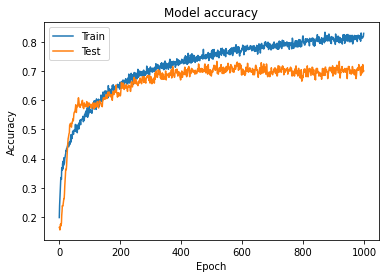

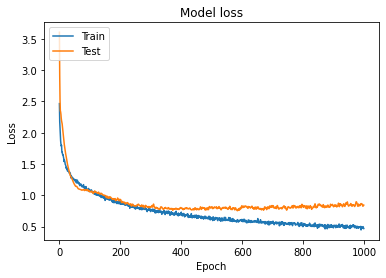

In [331]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
# plt.ylim([0.90,1.00])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
#plt.ylim([0,0.3])
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [332]:
loss, accuracy_d = model.evaluate(X_test, y_test, verbose=0)
print("Untrained model, accuracy: {:5.2f}%".format(100 * accuracy_d))

Untrained model, accuracy: 70.02%


In [333]:
model.load_weights("saved_models/audio_classification.hdf5")
# model.load_weights("models/87.5%.hdf5")

loss, accuracy_d = model.evaluate(X_test, y_test, verbose=0)
print("Restored model, accuracy: {:5.2f}%".format(100 * accuracy_d))

Restored model, accuracy: 73.09%


In [42]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

8/8 [==============================] - 0s 4ms/step


In [41]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.94140625


In [43]:
predict_x

array([[1.27559838e-11, 6.01601812e-07, 9.99999404e-01],
       [6.72381839e-09, 6.28492708e-05, 9.99937177e-01],
       [7.32372172e-08, 9.91495699e-03, 9.90085006e-01],
       [5.94861493e-09, 1.44869264e-03, 9.98551309e-01],
       [9.99984741e-01, 6.10910274e-06, 9.15750388e-06],
       [9.99990225e-01, 9.54300413e-06, 1.85443213e-07],
       [1.10767886e-07, 4.59166151e-03, 9.95408237e-01],
       [1.40397038e-04, 9.99859214e-01, 3.13960214e-07],
       [8.12748354e-03, 9.91868258e-01, 4.20416018e-06],
       [1.34355318e-08, 4.44686384e-06, 9.99995589e-01],
       [3.83977977e-06, 9.99995232e-01, 9.68476229e-07],
       [3.32281056e-12, 5.31795319e-09, 1.00000000e+00],
       [9.99998450e-01, 1.60242291e-06, 9.67106881e-11],
       [9.84329224e-01, 1.55705614e-02, 1.00250909e-04],
       [1.57169607e-02, 4.36414748e-01, 5.47868311e-01],
       [9.99994755e-01, 5.29521003e-06, 5.47183383e-08],
       [5.30207217e-05, 6.92550540e-02, 9.30691898e-01],
       [9.99999881e-01, 1.38834

In [44]:
classes_x

array([2, 2, 2, 2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 2, 0, 2, 0, 1, 2, 1, 0,
       1, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0, 0, 2, 2, 1, 0, 1, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 2, 0, 0, 2, 0, 1, 1, 0, 1, 2, 2, 2, 1, 2, 0, 1, 2, 0,
       1, 1, 0, 1, 1, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2,
       0, 1, 1, 0, 0, 2, 2, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 0,
       2, 0, 0, 1, 2, 0, 2, 1, 2, 1, 2, 0, 0, 1, 2, 2, 0, 0, 1, 0, 1, 1,
       2, 0, 2, 1, 0, 1, 2, 0, 2, 2, 0, 2, 2, 0, 1, 1, 2, 1, 1, 2, 0, 1,
       0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 1, 2, 2, 1, 1, 2, 1, 2,
       2, 2, 0, 0, 2, 1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 2, 1,
       2, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2, 2, 0, 1, 0, 2, 1, 2, 2, 1,
       2, 0, 2, 2, 1, 1, 1, 2, 0, 2, 1, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0,
       1, 1, 2, 1, 1, 0, 2, 0, 1, 2, 1, 2, 2, 1], dtype=int64)

In [45]:
filename="French Test Samples/taxi1.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)
print(predicted_label)
classes_x=np.argmax(predicted_label,axis=1)
prediction_class = labelencoder.inverse_transform(classes_x)
prediction_class

[-276.71732     120.77368       5.3305125    12.242447      7.849333
    9.689318    -11.070928      0.8515188   -20.797642     -8.653248
  -20.327917     -5.4479346   -17.915602    -12.043211    -11.097097
   -4.9122553   -13.986245     -8.010093     -5.505586    -10.373336
   -9.947507     -3.750445     -6.268835     -4.365143     -4.7077484
   -4.1258574    -3.5765269    -2.942056     -4.426134     -2.3961754
   -3.9006197    -2.4674652    -3.299541     -1.065356     -0.4790721
   -2.59775      -0.8374773    -0.66110253   -1.5745608     1.4437628 ]
[[-276.71732     120.77368       5.3305125    12.242447      7.849333
     9.689318    -11.070928      0.8515188   -20.797642     -8.653248
   -20.327917     -5.4479346   -17.915602    -12.043211    -11.097097
    -4.9122553   -13.986245     -8.010093     -5.505586    -10.373336
    -9.947507     -3.750445     -6.268835     -4.365143     -4.7077484
    -4.1258574    -3.5765269    -2.942056     -4.426134     -2.3961754
    -3.9006197    -2

array(['Anger'], dtype='<U9')

In [68]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1
